(502,)


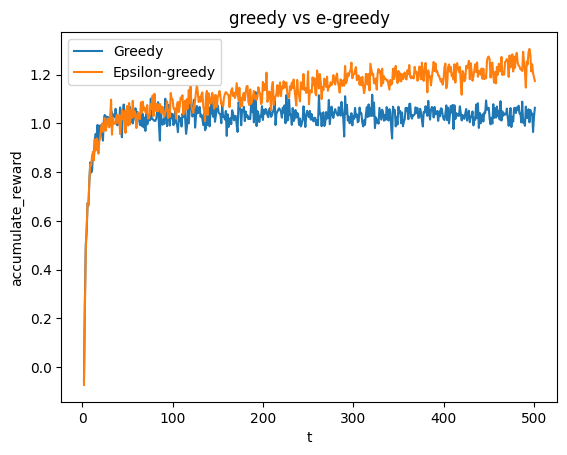

In [1]:
#python，java语言的基本语法

#如何画流程图

#库函数的应用
    #numpy,pands,matplotlib

#框架的函数应用
    #pytorch

#先从自然语言层面，弄懂程序要解决的问题

# 数据
    #有哪些数据以及数据的来源
    #数据的的存储：用什么容器： 数组，矩阵ndarray，map 

#先画流程图，知道每一步做什么

#算法
    #转化成程序处理，每一步如何转化成程序处理
        # 变量的设置，需要使用那些变量代表物理事物
        # 数据的存储，用什么容器： 数组，list,tuple,矩阵ndarray，map，set
        # 参数变量的设置（易于修改和维护），for循环，条件判断，赋值
        # 使用函数定义一个功能
        # 高级特性，语法糖，可以简洁快速的实现功能


import numpy as np
import matplotlib.pyplot as plt

l = 500
c = 10
runs = 1000
e = 0.01

rng = np.random.default_rng(2)


acc_rewards_t = np.zeros(l+2)
acc_rewards_t2 = np.zeros(l+2)
print(acc_rewards_t.shape)

for run in range(runs):

    occ_action = np.zeros(c) #每个老虎机被选择的次数
    acc_rewards = np.zeros(c) #每个老虎机累积的奖励
    estimated_reward = np.zeros(c) # 基于过去经验，估计老虎机给出奖励

    occ_action2 = np.zeros(c) #每个老虎机被选择的次数
    acc_rewards2 = np.zeros(c) #每个老虎机累积的奖励
    estimated_reward2 = np.zeros(c) # 基于过去经验，估计老虎机给出奖励
    

    multil_arm_u = rng.normal(0,1,c)

    for t in range(1,l+1):

        for i in range(c):
            estimated_reward[i] = 0 if acc_rewards[i] == 0 else acc_rewards[i] / occ_action[i] #计算t时刻时，每一个老虎机的过去的奖励均值
            estimated_reward2[i] = 0 if acc_rewards2[i] == 0 else acc_rewards2[i] / occ_action2[i] #计算t时刻时，每一个老虎机的过去的奖励均值


        a_t = np.argmax(estimated_reward).item(0) # 选取奖励最大的老虎机的下标
        reward_t = rng.normal(multil_arm_u[a_t],1) #给出奖励

        occ_action[a_t]+=1 #老虎机选择次数加一
        acc_rewards[a_t] += reward_t #老虎机奖励累加
        acc_rewards_t[t+1] += reward_t
        
        if rng.random() > e:
            # 贪婪选择
            a_t2 = np.argmax(estimated_reward2).item(0)
            reward_t2 = rng.normal(multil_arm_u[a_t2],1)
        else:
            # 随机选择
            a_t2 = rng.integers(0,c)
            reward_t2 = rng.normal(multil_arm_u[a_t2],1)
            # reward_t2 = rng.normal(multil_arm_u[rng.integers(0,c)],1)

        

        occ_action2[a_t2]+=1 #老虎机选择次数加一
        acc_rewards2[a_t2] += reward_t2 #老虎机奖励累加
        acc_rewards_t2[t+1] += reward_t2 

acc_rewards_t = acc_rewards_t[2:]
acc_rewards_t2 = acc_rewards_t2[2:]


plt.figure()#创建图像

plt.plot(range(2,l+2),acc_rewards_t/runs)
plt.plot(range(2,l+2),acc_rewards_t2/runs)


plt.xlabel("t")
plt.ylabel("accumulate_reward")
plt.legend(['Greedy','Epsilon-greedy'])
plt.title("greedy vs e-greedy")

plt.show() #显示

